# FDTD 2D basic routine tests

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sympy import symbols, sin, cos, tan ,exp
from sympy import lambdify
from sympy import S
import sympy as sp

#from test_fdtd import *

---

In [2]:
x, y, z = sp.symbols("x, y, z")

In [3]:
M = sp.Matrix([[x, y, z], [x*y, y*z, x**2], [z/(x+1), y*z, x]])

In [4]:
func_m = sp.lambdify([x, y ,z], M, modules="numpy")

In [5]:
func_m(np.ones(3), np.array([1, 2, 3]), np.zeros(3))

array([[[1., 1., 1.],
        [1., 2., 3.],
        [0., 0., 0.]],

       [[1., 2., 3.],
        [0., 0., 0.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.]]])

In [6]:
M

Matrix([
[        x,   y,    z],
[      x*y, y*z, x**2],
[z/(x + 1), y*z,    x]])

In [7]:
M.tolist()

[[x, y, z], [x*y, y*z, x**2], [z/(x + 1), y*z, x]]

In [8]:
sp.simplify(M_cal_xyz)

NameError: name 'M_cal_xyz' is not defined

In [ ]:
M_cal_xyz.tolist()

[[1.0*(x**2 + y**2*(x**2 + y**2))/(x**2 + y**2)**(3/2),
  1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),
  0],
 [1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),
  1.0*(x**2*(x**2 + y**2) + y**2)/(x**2 + y**2)**(3/2),
  0],
 [0, 0, 1.0/sqrt(x**2 + y**2)]]

In [ ]:
[[*M_cal_xyz[:3]], [*M_cal_xyz[3:6]], [*M_cal_xyz[6:9]]]

[[1.0*(x**2 + y**2*(x**2 + y**2))/(x**2 + y**2)**(3/2),
  1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),
  0],
 [1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),
  1.0*(x**2*(x**2 + y**2) + y**2)/(x**2 + y**2)**(3/2),
  0],
 [0, 0, 1.0/sqrt(x**2 + y**2)]]

In [9]:
func_xy = sp.lambdify(xyz_s[:2], M_cal_xyz.tolist(), modules="numpy")

NameError: name 'xyz_s' is not defined

In [10]:
result = (func_xy(X, Y))

NameError: name 'func_xy' is not defined

---

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [12]:
from imfdtd.utils import *

## Jacobian for metric tensor

From the coordinate transform matrix $\Lambda$, we have next transform of metric matrices, $G', G_c$.

$$G' = \Lambda G_c \Lambda^T$$

We know that the cartessian metric is idensity metric, Kroneker delta, the $G_c = I$.

Therefore, we have general metric representation in matrix form as 

$$G' = \Lambda \Lambda^T$$

Some metrices are more convinence if we represent them with transfomation from spherical or cylinderical coordinate values. In such case, 

$$G' = \Lambda (\Lambda_c \Lambda_c^T)\Lambda^T$$

In [13]:
xyz_s, cylin_s, sph_s = get_basic_coordinates()

In [14]:
print(basic_coord_transform_eqs(xyz_s, "xyz", "cylinder"))
print(basic_coord_transform_eqs(xyz_s, "xyz", "spherical"))

[sqrt(x**2 + y**2), atan(y/x), z]
[sqrt(x**2 + y**2 + z**2), atan(sqrt(x**2 + y**2)/z), atan(y/x)]


In [15]:
print(basic_coord_transform_eqs(cylin_s, "cylinder", "xyz"))
print(basic_coord_transform_eqs(cylin_s, "cylinder", "spherical"))

[r*cos(\phi), r*sin(\phi), z]
[sqrt(r**2 + z**2), \phi, atan(r/z)]


In [16]:
print(basic_coord_transform_eqs(sph_s, "spherical", "xyz"))
print(basic_coord_transform_eqs(sph_s, "spherical", "cylinder"))

[r_s*sin(\phi_s)*cos(\theta_s), r_s*sin(\phi_s)*sin(\theta_s), r_s*cos(\phi_s)]
[r_s*sin(\theta_s), \phi_s, r_s*cos(\theta_s)]


In [17]:
xyz_s, cylin_s, sph_s

((x, y, z), [r, \phi, z], [r_s, \phi_s, \theta_s])

In [18]:
rs, phis, thetas = sph_s

Jacobian

$$\Lambda_p^q = \mathbf{J}_{p \rightarrow q} = \frac{\partial (p_1, p_2, p_3, ..., p_m)}{\partial (q_1, q_2, q_3, ..., q_n)}\\
 \\
= \begin{bmatrix} 
\frac{\partial p_1}{\partial q_1} & \frac{\partial p_1}{\partial q_2}&\cdots & \frac{\partial p_1}{\partial q_n} \\
\frac{\partial p_2}{\partial q_1} & \frac{\partial p_2}{\partial q_2}&\cdots & \frac{\partial p_2}{\partial q_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial p_m}{\partial q_1} & \frac{\partial p_m}{\partial q_2}&\cdots & \frac{\partial p_m}{\partial q_n}
\end{bmatrix}$$

$$\mathbf{J}_{p \rightarrow q}  = \Lambda_p^r \Lambda_r^q = \mathbf{J}_{p \rightarrow r} \mathbf{J}_{r \rightarrow q} $$

In [19]:
# Calculate jacobian using "get_jacobian" routine. 
# you can calulate arbitary q, p values with equations arguments.
# get_jacobian(qs, eqs)
# Spherical to Cartessian
qs = sph_s
eqs_s = basic_coord_transform_eqs(qs, "spherical", "xyz")
sp_to_xyz = get_jacobian(qs, eqs_s)
print("Spehrical to Cartesian Cooridnate")
sp_to_xyz

Spehrical to Cartesian Cooridnate


Matrix([
[sin(\phi_s)*cos(\theta_s), r_s*cos(\phi_s)*cos(\theta_s), -r_s*sin(\phi_s)*sin(\theta_s)],
[sin(\phi_s)*sin(\theta_s), r_s*sin(\theta_s)*cos(\phi_s),  r_s*sin(\phi_s)*cos(\theta_s)],
[              cos(\phi_s),              -r_s*sin(\phi_s),                              0]])

In [20]:
ps = xyz_s
eqs_s2 = basic_coord_transform_eqs(ps, "xyz", "spherical")
xyz_to_sp = get_jacobian(ps, eqs_s2)
print("Cartesian to Spehrical Cooridnate")
sp.simplify(xyz_to_sp)

Cartesian to Spehrical Cooridnate


Matrix([
[                  x/sqrt(x**2 + y**2 + z**2),                   y/sqrt(x**2 + y**2 + z**2),              z/sqrt(x**2 + y**2 + z**2)],
[x*z/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)), y*z/(sqrt(x**2 + y**2)*(x**2 + y**2 + z**2)), -sqrt(x**2 + y**2)/(x**2 + y**2 + z**2)],
[                            -y/(x**2 + y**2),                              x/(x**2 + y**2),                                       0]])

If we want to implement 
$$\mathbf{J}_{p \rightarrow q}  = \Lambda_p^r \Lambda_r^q = \mathbf{J}_{p \rightarrow r} \mathbf{J}_{r \rightarrow q} $$

in Jacobian implementation, we have to unifty the all variables of Jacobian. Using `represent_with_basic_coord`, we can convert arbitary Jacobian in terms of basic coordinates. If you define new coordinate system based on *spherical coordinate*, $r, \phi, \theta$ and you want to represent them with Cartensian, $x, y, z$, 

```
represent_with_basic_coord(
    Jacobian,
    [r, phi, theta],
    [x, y ,z],
    coord_basic = "spherical",
    coord_rep = "xyz
)
```

In [21]:
sp_to_xyz

Matrix([
[sin(\phi_s)*cos(\theta_s), r_s*cos(\phi_s)*cos(\theta_s), -r_s*sin(\phi_s)*sin(\theta_s)],
[sin(\phi_s)*sin(\theta_s), r_s*sin(\theta_s)*cos(\phi_s),  r_s*sin(\phi_s)*cos(\theta_s)],
[              cos(\phi_s),              -r_s*sin(\phi_s),                              0]])

In [22]:
# Spherical to XYZ representation change
sp_to_xyz_rep = sp.simplify(
    represent_with_basic_coord(
        sp_to_xyz, sph_s, xyz_s, 
        coord_basic="spherical", coord_rep="xyz"))
sp_to_xyz_rep

Matrix([
[    Abs(x*z)/(z*sqrt(x**2 + y**2 + z**2)),       Abs(x*z)/sqrt(x**2 + y**2), -y*Abs(x*z)/(x*z)],
[y*Abs(x*z)/(x*z*sqrt(x**2 + y**2 + z**2)), y*Abs(x*z)/(x*sqrt(x**2 + y**2)),        Abs(x*z)/z],
[          Abs(z)/sqrt(x**2 + y**2 + z**2),      -sqrt(x**2 + y**2)*Abs(z)/z,                 0]])

In [23]:
# Identity test
restore = sp.simplify(
    represent_with_basic_coord(
        sp_to_xyz_rep, xyz_s, sph_s, 
        coord_basic="xyz", coord_rep="spherical")
        )
restore

Matrix([
[              Abs(sin(2*\phi_s - \theta_s) + sin(2*\phi_s + \theta_s))/(4*cos(\phi_s)),               r_s*Abs((sin(2*\phi_s - \theta_s) + sin(2*\phi_s + \theta_s))/sin(\phi_s))/4, -r_s*tan(\theta_s)*Abs(sin(2*\phi_s - \theta_s) + sin(2*\phi_s + \theta_s))/(4*cos(\phi_s))],
[tan(\theta_s)*Abs(sin(2*\phi_s - \theta_s) + sin(2*\phi_s + \theta_s))/(4*cos(\phi_s)), r_s*tan(\theta_s)*Abs((sin(2*\phi_s - \theta_s) + sin(2*\phi_s + \theta_s))/sin(\phi_s))/4,                r_s*Abs(sin(2*\phi_s - \theta_s) + sin(2*\phi_s + \theta_s))/(4*cos(\phi_s))],
[                                                                      Abs(cos(\phi_s)),                                              -r_s*Abs(sin(\phi_s)*cos(\phi_s))/cos(\phi_s),                                                                                           0]])

In [24]:
r = 0.5
phi = np.pi/10
theta = np.pi/3

x   = r *   np.sin(phi) *   np.cos(theta)
y   = r *   np.sin(phi) *   np.sin(theta)
z   = r *   np.cos(phi)

In [25]:
xs, ys, zs =xyz_s

In [26]:
sp_to_xyz.subs([
    (sph_s[0], r),
    (sph_s[1], phi),
    (sph_s[2], theta)])

Matrix([
[0.154508497187474,  0.237764129073788, -0.133808283664909],
[0.267616567329817,  0.411819551773166, 0.0772542485937369],
[0.951056516295154, -0.154508497187474,                  0]])

In [27]:
sp_to_xyz_rep.subs([
    (xyz_s[0], x), 
    (xyz_s[1], y), 
    (xyz_s[2], z)])

Matrix([
[0.154508497187474,  0.237764129073788, -0.133808283664909],
[0.267616567329817,  0.411819551773166, 0.0772542485937369],
[0.951056516295154, -0.154508497187474,                  0]])

In [28]:
restore.subs([
    (sph_s[0],r),
    (sph_s[1], phi),
    (sph_s[2], theta)])

Matrix([
[0.154508497187474,  0.237764129073788, -0.133808283664909],
[0.267616567329817,  0.411819551773166, 0.0772542485937369],
[0.951056516295154, -0.154508497187474,                  0]])

## Relative Tensor of Electomagnetics

$$\epsilon^{ij} = \mu^{ij} = + \frac{\sqrt{\det{G'}}}{\sqrt{\det{\Gamma}}} \frac{\Lambda G'^{-1} \Lambda^T}{\det{\Lambda}}$$

We will simulate them in Cartesian coordinate system, let's denote as $\mathcal{P}$, therefore, $\Gamma = I$.
In addition, we will assume that the electromagnetic space, $\mathcal{E}$, is a flat space, Cartesian and the space will be mapped to distorted transformation. 

$$\mathcal{E} \rightarrow \mathcal{P}$$

then, the both metric $g_p = g_e$ are just kronker delta and we get.

$$\epsilon^{ij} = \mu^{ij} = \frac{1}{\det{\Lambda}} \Lambda \Lambda^T$$

Suppose we want to make invisible circle region on 2D surface.

$$R_1 \leq r \leq R_2$$

* $u_1 = R_1 + \frac{R_2 -R_1}{R_1}r$.
* $u_2 = \phi$
* $u_3 = z

$0 \leq r' \leq R_2$ then, $r' = \frac{r}{R_1}$

In [29]:
r_cy, phi_cy, z_cy = cylin_s
cy_xyz = get_jacobian(cylin_s, basic_coord_transform_eqs(cylin_s, "cylinder", "xyz")) 

In [30]:
cy_xyz

Matrix([
[cos(\phi), -r*sin(\phi), 0],
[sin(\phi),  r*cos(\phi), 0],
[        0,            0, 1]])

In [31]:
R1, R2 = sp.symbols("R_1 R_2", positive=True, real=True)

In [32]:
r_c, phi_c, z_c = cylin_s

In [33]:
u1 = R1 + ((R2- R1)/R1)*r_c
u2 = phi_c
u3 = z_c

In [34]:
A = get_jacobian([r_c, phi_c, z_c], [u1, u2, u3])
A

Matrix([
[(-R_1 + R_2)/R_1, 0, 0],
[               0, 1, 0],
[               0, 0, 1]])

In [35]:
J = (A@cy_xyz)
J

Matrix([
[(-R_1 + R_2)*cos(\phi)/R_1, -r*(-R_1 + R_2)*sin(\phi)/R_1, 0],
[                 sin(\phi),                   r*cos(\phi), 0],
[                         0,                             0, 1]])

In [36]:
r1 = 1E-2
r2= 2E-2

In [37]:
J.subs([(R1, r1), (R2, r2)])

Matrix([
[1.0*cos(\phi), -1.0*r*sin(\phi), 0],
[    sin(\phi),      r*cos(\phi), 0],
[            0,                0, 1]])

In [38]:
M = sp.simplify(J@J.T)/sp.simplify(J.det())

In [39]:
r1 = 2E-2
r2 = 4E-2

In [40]:
M_cal = M.subs([(R1, r1), (R2, r2)])
M_cal

Matrix([
[1.0*(r**2*sin(\phi)**2 + cos(\phi)**2)/r,            -0.5*(r**2 - 1)*sin(2*\phi)/r,     0],
[           -0.5*(r**2 - 1)*sin(2*\phi)/r, 1.0*(r**2*cos(\phi)**2 + sin(\phi)**2)/r,     0],
[                                       0,                                        0, 1.0/r]])

In [41]:
M_cal_xyz = sp.simplify(represent_with_basic_coord(M_cal, cylin_s, xyz_s, coord_basic="cylinder", coord_rep="xyz"))
M_cal_xyz

Matrix([
[1.0*(x**2 + y**2*(x**2 + y**2))/(x**2 + y**2)**(3/2),      1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),                     0],
[     1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2), 1.0*(x**2*(x**2 + y**2) + y**2)/(x**2 + y**2)**(3/2),                     0],
[                                                   0,                                                    0, 1.0/sqrt(x**2 + y**2)]])

In [42]:
Mxy_func = lambda x,y: M_cal_xyz.subs([(xyz_s[0], x), (xyz_s[1], y)])

In [43]:
Mxy_func(0, r1)

Matrix([
[0.02,    0,    0],
[   0, 50.0,    0],
[   0,    0, 50.0]])

In [44]:
Mxy_func(0, r2)

Matrix([
[0.04,    0,    0],
[   0, 25.0,    0],
[   0,    0, 25.0]])

In [45]:
theta = np.pi/2
Mxy_func(r1*np.cos(theta), r1*np.sin(theta))


Matrix([
[                0.02, 3.06039235106924e-15,    0],
[3.06039235106924e-15,                 50.0,    0],
[                   0,                    0, 50.0]])

In [46]:
theta = np.pi/2
Mxy_func(r2*np.cos(theta), r2*np.sin(theta))


Matrix([
[               0.04, 1.5283592053359e-15,    0],
[1.5283592053359e-15,                25.0,    0],
[                  0,                   0, 25.0]])

Calculate e_r, mu_r tensor by the given mesh grid

In [47]:
M_cal_xyz

Matrix([
[1.0*(x**2 + y**2*(x**2 + y**2))/(x**2 + y**2)**(3/2),      1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),                     0],
[     1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2), 1.0*(x**2*(x**2 + y**2) + y**2)/(x**2 + y**2)**(3/2),                     0],
[                                                   0,                                                    0, 1.0/sqrt(x**2 + y**2)]])

In [48]:
xyz_s[:2][0]

x

In [49]:
func_M = sp.lambdify(xyz_s[:2], M_cal_xyz.tolist(), modules = "numpy")

In [50]:
xline = np.linspace(-5, 5, 20)
yline = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(xline, yline)
Z = np.zeros(X.shape)

Reference tensor

```
Full-wave simulations of electomagneic cloacking structures, 10.1103/PhysRevE.74.036621
```

* $\epsilon_{xx} = \frac{r-R_1}{r} \cos^2(\phi) + \frac{r}{r - R_1} \sin^2(\phi)$
* $\epsilon_{xy} = \epsilon_{yx} = (\frac{r-R_1}{r}- \frac{r}{r - R_1}) \sin(\phi)\cos(\phi)$
* $\epsilon_{yy} = \frac{r-R_1}{r} \sin^2(\phi) + \frac{r}{r - R_1} \cos^2(\phi)$

In [51]:
M

Matrix([
[(R_1 - R_2)**2*(r**2*sin(\phi)**2 + cos(\phi)**2)/(R_1*r*(-R_1 + R_2)),   (R_1 - R_2)*(r**2 - 1)*sin(2*\phi)/(2*r*(-R_1 + R_2)),                    0],
[                 (R_1 - R_2)*(r**2 - 1)*sin(2*\phi)/(2*r*(-R_1 + R_2)), R_1*(r**2*cos(\phi)**2 + sin(\phi)**2)/(r*(-R_1 + R_2)),                    0],
[                                                                     0,                                                       0, R_1/(r*(-R_1 + R_2))]])

In [52]:
M_cal_xyz, xyz_s

(Matrix([
 [1.0*(x**2 + y**2*(x**2 + y**2))/(x**2 + y**2)**(3/2),      1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2),                     0],
 [     1.0*x*y*(-x**2 - y**2 + 1)/(x**2 + y**2)**(3/2), 1.0*(x**2*(x**2 + y**2) + y**2)/(x**2 + y**2)**(3/2),                     0],
 [                                                   0,                                                    0, 1.0/sqrt(x**2 + y**2)]]),
 (x, y, z))

In [53]:
func_cal_em = get_func_gij(xyz_s, M_cal_xyz)

In [54]:
# X, Y, Z = mesh of xline, yline
xline = np.linspace(-2, 2, 4)
yline = np.linspace(-3, -3, 4)
X, Y = np.meshgrid(xline, yline)
Z = np.zeros(X.shape)

In [55]:
func_cal_em(X, Y, Z)

array([[[[ 2.58148937, -1.53609285,  0.        ],
         [-1.53609285,  1.301412  ,  0.        ],
         [ 0.        ,  0.        ,  0.2773501 ]],

        [[ 2.94387392, -0.58188405,  0.        ],
         [-0.58188405,  0.45470325,  0.        ],
         [ 0.        ,  0.        ,  0.32539569]],

        [[ 2.94387392,  0.58188405,  0.        ],
         [ 0.58188405,  0.45470325,  0.        ],
         [ 0.        ,  0.        ,  0.32539569]],

        [[ 2.58148937,  1.53609285,  0.        ],
         [ 1.53609285,  1.301412  ,  0.        ],
         [ 0.        ,  0.        ,  0.2773501 ]]],


       [[[ 2.58148937, -1.53609285,  0.        ],
         [-1.53609285,  1.301412  ,  0.        ],
         [ 0.        ,  0.        ,  0.2773501 ]],

        [[ 2.94387392, -0.58188405,  0.        ],
         [-0.58188405,  0.45470325,  0.        ],
         [ 0.        ,  0.        ,  0.32539569]],

        [[ 2.94387392,  0.58188405,  0.        ],
         [ 0.58188405,  0.45470325, 

In [175]:
a = [[1, 2],[3, 4]]

In [176]:
a[1,1]

TypeError: list indices must be integers or slices, not tuple

In [42]:
e_tensor = func_cal_em(X, Y, Z)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 3) + inhomogeneous part.

In [ ]:
Mxy_func(xline[0], yline[0])

Matrix([
[ 2.58148937474049, -1.53609285108525,                 0],
[-1.53609285108525,  1.30141199883611,                 0],
[                0,                 0, 0.277350098112615]])

In [43]:
e_tensor[0:2][0:2]

NameError: name 'e_tensor' is not defined

## Object grid detection

In [12]:
from matplotlib.patches import Ellipse, Rectangle, PathPatch
from matplotlib.path import Path
from matplotlib import pyplot as plt

import numpy as np

In [66]:
from typing import Iterable

In [67]:
isinstance(a, Iterable)

True

In [13]:
r2 = 3
r1 = 1

In [14]:
#Ellipse
a = r2
b = r2
angle = 0

ellipse_out = Ellipse([0,0], width = a, height =b, angle=angle)
ellipse_in = Ellipse([0,0], width = r1, height=r1)

e_path_out = ellipse_out.get_path()
e_transform_out = ellipse_out.get_transform()
e_path_out_poly = e_transform_out.transform_path(e_path_out)

e_path_in = ellipse_in.get_path()
e_transform_in = ellipse_in.get_transform()
e_path_in_poly = e_transform_in.transform_path(e_path_in)


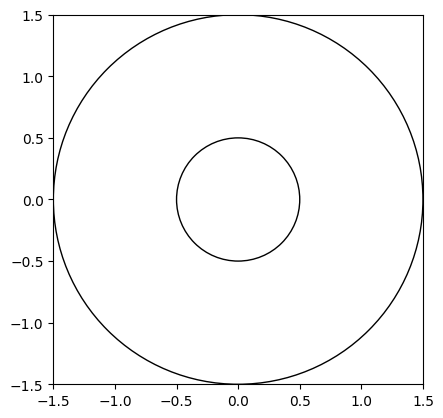

In [15]:
fig, ax = plt.subplots()
e_polygon_out = PathPatch(e_path_out_poly, facecolor='none')
e_polygon_in = PathPatch(e_path_in_poly, facecolor='none')

ax.add_patch(e_polygon_out)
ax.add_patch(e_polygon_in)

ax.set_ylim(-b/2, b/2)
ax.set_xlim(-a/2, a/2)
ax.set_aspect('equal', adjustable='box')
plt.show()

In [33]:
e_path_out_poly.contains_path(e_path_in_poly)

True

In [32]:
e_path_in.contains_path(e_path_out)

False

In [16]:
yline = np.linspace(-b,b, 200)
xline = np.linspace(-a,a, 200)
mesh_x, mesh_y = np.meshgrid(xline, yline)
points = np.vstack([mesh_x.ravel(), mesh_y.ravel()]).T

In [17]:
p_index_out = e_path_out_poly.contains_points(points) #
p_index_in = e_path_in_poly.contains_points(points)

In [18]:
p_index = np.logical_xor(p_index_out, p_index_in) # Eleiminate inside hole grid

In [19]:
index = np.where(p_index)[0]
inside = points[index]
scatter_points = inside.T

In [24]:
nx, ny = mesh_x.shape
nx*ny

40000

In [25]:
index%nx

array([ 98,  99, 100, ...,  99, 100, 101], dtype=int64)

In [28]:
(index/nx).astype(int)

array([ 50,  50,  50, ..., 149, 149, 149])

In [29]:
mesh_x[(index/nx).astype(int), index%nx]

array([-0.04522613, -0.01507538,  0.01507538, ..., -0.01507538,
        0.01507538,  0.04522613])

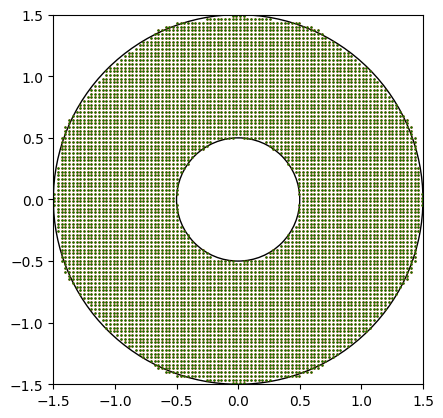

In [30]:
fig, ax = plt.subplots()
e_polygon_out = PathPatch(e_path_out_poly, facecolor='none')
e_polygon_in = PathPatch(e_path_in_poly, facecolor='none')
ax.add_patch(e_polygon_out)
ax.add_patch(e_polygon_in)
ax.scatter(scatter_points[0], scatter_points[1], c="r", s=0.5)
ax.scatter(
    mesh_x[(index/nx).astype(int), index%nx], 
    mesh_y[(index/nx).astype(int), index%nx], c="g", s=0.5)
ax.set_ylim(-b/2, b/2)
ax.set_xlim(-a/2, a/2)

ax.set_aspect('equal', adjustable='box')
plt.show()


## Generating Yee's lattice

In [109]:
cm = 1E-2
E_p, H_p= yee_lattices([-4*cm, 4*cm], [-4*cm, 4*cm], n=[50, 50])
dx = E_p[0][0][1] - E_p[0][0][0]
dy = E_p[1][1][0] -E_p[1][0][0]

Text(0.5, 1.0, 'Yee Grid for 2D FDTD')

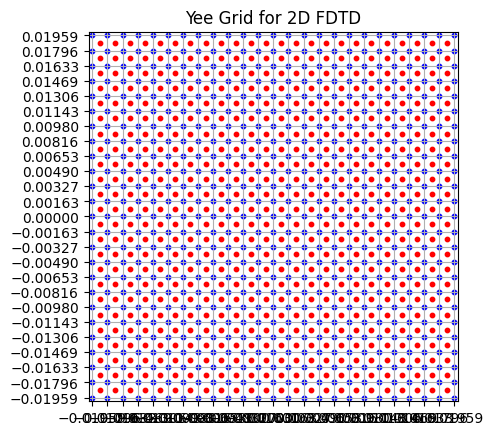

In [110]:
fig, ax = plt.subplots()
r = 2
ax.set_aspect('equal', adjustable='box')

ax.scatter(E_p[0], E_p[1], c="r", s=10)
ax.scatter(H_p[0], H_p[1], c="b", s=10)

ax.set_xticks(H_p[0][0])
ax.set_yticks(H_p[1][:].T[0])

ax.grid(which="major")
ax.set_xlim(-r*cm, r*cm)
ax.set_ylim(-r*cm, r*cm)

ax.set_title("Yee Grid for 2D FDTD")

Text(0.5, 1.0, 'Yee Grid for 2D FDTD')

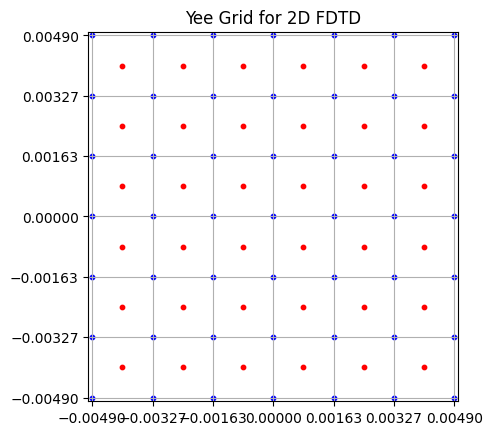

In [111]:
fig, ax = plt.subplots()
r = 0.5
ax.set_aspect('equal', adjustable='box')

ax.scatter(E_p[0], E_p[1], c="r", s=10)
ax.scatter(H_p[0], H_p[1], c="b", s=10)

ax.set_xticks(H_p[0][0])
ax.set_yticks(H_p[1][:].T[0])

ax.grid(which="major")
ax.set_xlim(-r*cm, r*cm)
ax.set_ylim(-r*cm, r*cm)

ax.set_title("Yee Grid for 2D FDTD")

---

In [25]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [26]:
import numpy as np
from matplotlib import pyplot as plt

from sympy import symbols, sin, cos, tan ,exp
from sympy import lambdify
from sympy import S
import sympy as sp

import imfdtd.utils as tfdtd

In [38]:
from matplotlib.patches import Ellipse, Rectangle, PathPatch

In [69]:
np.arange(27).reshape((3,3, 3))[1:, :]

array([[[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [78]:
def curl_E(E_field):
    curl_E = np.zeros(E_field.shape)

    # We only consider 2D TM mode wave
    curl_E[:-1, :, 0] += E_field[1:, : , 2] - E_field[:-1, :, 2]
    curl_E[:, :-1, 1] -= E_field[:, 1: , 2] - E_field[:, :-1, 2]

    return curl_E
def curl_H(H_field):
    curl = np.zeros(H_field.shape, dtype=H_field.dtype)

    curl[:,:-1, 2] += H_field[:,1:, 1] - H_field[:,:-1, 1]
    curl[:-1,:, 2] -= H_field[1:, :, 0] - H_field[:-1,:, 0]
    return curl


In [79]:
curl_E(np.arange(27).reshape((3,3,3)))

array([[[ 9., -3.,  0.],
        [ 9., -3.,  0.],
        [ 9.,  0.,  0.]],

       [[ 9., -3.,  0.],
        [ 9., -3.,  0.],
        [ 9.,  0.,  0.]],

       [[ 0., -3.,  0.],
        [ 0., -3.,  0.],
        [ 0.,  0.,  0.]]])

In [80]:
curl_H(np.arange(27).reshape((3,3,3)))

array([[[ 0,  0, -6],
        [ 0,  0, -6],
        [ 0,  0, -9]],

       [[ 0,  0, -6],
        [ 0,  0, -6],
        [ 0,  0, -9]],

       [[ 0,  0,  3],
        [ 0,  0,  3],
        [ 0,  0,  0]]])

In [39]:
# Matrix multiplication
def mv_mul(
        matrix_arr:np.ndarray, 
        vector_arr:np.ndarray):
    # Ensure that the shapes of the input arrays are compatible
    assert matrix_arr.shape[:2] == vector_arr.shape[:2], "Shapes of matrix and vector arrays must be the same (N, M)."
    assert matrix_arr.shape[-2:] == (3, 3), "Matrix array must have shape (N, M, 3, 3)."
    assert vector_arr.shape[-1] == 3, "Vector array must have shape (N, M, 3)."

    # Perform element-wise matrix-vector multiplication
    result = np.einsum('ijkl,ijl->ijk', matrix_arr, vector_arr)

    return result

In [40]:
CM = 1E-2
r1= 5*CM
r2 = 10*CM

In [41]:
xlim = np.array([-20*CM, 20*CM])
ylim = np.array([-30*CM, 30*CM])
Points, Fields, Tensor = tfdtd.prepare_simulation([
    xlim,ylim], [200, 300])
E_points, H_points = Points
E_field, H_field = Fields
g_tensor_e, g_tensor_h = Tensor

-0.3 0.3


In [42]:
Points

([array([[-0.2       , -0.19798995, -0.1959799 , ...,  0.1959799 ,
           0.19798995,  0.2       ],
         [-0.2       , -0.19798995, -0.1959799 , ...,  0.1959799 ,
           0.19798995,  0.2       ],
         [-0.2       , -0.19798995, -0.1959799 , ...,  0.1959799 ,
           0.19798995,  0.2       ],
         ...,
         [-0.2       , -0.19798995, -0.1959799 , ...,  0.1959799 ,
           0.19798995,  0.2       ],
         [-0.2       , -0.19798995, -0.1959799 , ...,  0.1959799 ,
           0.19798995,  0.2       ],
         [-0.2       , -0.19798995, -0.1959799 , ...,  0.1959799 ,
           0.19798995,  0.2       ]]),
  array([[-0.3       , -0.3       , -0.3       , ..., -0.3       ,
          -0.3       , -0.3       ],
         [-0.29799331, -0.29799331, -0.29799331, ..., -0.29799331,
          -0.29799331, -0.29799331],
         [-0.29598662, -0.29598662, -0.29598662, ..., -0.29598662,
          -0.29598662, -0.29598662],
         ...,
         [ 0.29598662,  0.29598662

In [43]:
# Get relative tensor
s_xyz, s_cylinder, s_sph = tfdtd.get_basic_coordinates()
r_s, phi_s, z_s = s_cylinder
R1, R2 = sp.symbols("R_1, R_2")

In [44]:
# Define transoformation
u1 = R1 + ((R2- R1)/R1)*r_s
u2 = phi_s
u3 = z_s
eq_coor = [u1.subs([(R1, r1),(R2, r2)]), u2, u3]
syms = [r_s, phi_s, z_s]

In [45]:
gt = tfdtd.get_invisible_tensor(eq_coor, syms, s_xyz)
gt

Matrix([
[(1.0*x**4*sqrt(x**2 + y**2) + 1.0*x**2*y**2*sqrt(x**2 + y**2) + 1.0*y**2*sqrt(x**2 + y**2))/(1.0*x**4 + 2.0*x**2*y**2 + 1.0*y**4), (1.0*x**3*y*sqrt(x**2 + y**2) + 1.0*x*y**3*sqrt(x**2 + y**2) - 1.0*x*y*sqrt(x**2 + y**2))/(1.0*x**4 + 2.0*x**2*y**2 + 1.0*y**4),                     0],
[                                    (1.0*x**3*y + 1.0*x*y**3 - 1.0*x*y)/(1.0*x**2*sqrt(x**2 + y**2) + 1.0*y**2*sqrt(x**2 + y**2)),                                 (1.0*x**2*y**2 + 1.0*x**2 + 1.0*y**4)/(1.0*x**2*sqrt(x**2 + y**2) + 1.0*y**2*sqrt(x**2 + y**2)),                     0],
[                                                                                                                                0,                                                                                                                               0, 1.0*sqrt(x**2 + y**2)]])

In [46]:
gt = gt.inv()

In [47]:
gt.subs([(s_xyz[0], 0),(s_xyz[1], (r1+r2)/3)])

Matrix([
[0.05,    0,    0],
[   0, 20.0,    0],
[   0,    0, 20.0]])

In [58]:
func_gij = tfdtd.get_func_gij([s_xyz[0], s_xyz[1]], gt)

In [49]:
#Ellipse
a = r2
b = r2
angle = 0

ellipse_out = Ellipse([0,0], width = a, height =b, angle=angle)
ellipse_in = Ellipse([0,0], width = r1, height=r1)

e_path_out = ellipse_out.get_path()
e_transform_out = ellipse_out.get_transform()
e_path_out_poly = e_transform_out.transform_path(e_path_out)

e_path_in = ellipse_in.get_path()
e_transform_in = ellipse_in.get_transform()
e_path_in_poly = e_transform_in.transform_path(e_path_in)


In [50]:
# Calculate inner points index

Xe,Ye = E_points
n, m = Xe.shape
points = np.vstack([Xe.ravel(), Ye.ravel()]).T
p_bool_out = e_path_out_poly.contains_points(points) #
p_bool_in = e_path_in_poly.contains_points(points)
p_bool  = np.logical_xor(p_bool_out, p_bool_in)
index_r = index_c =  np.where(p_bool)[0]
index_r = (index_r/m).astype(int)
index_c = (index_c%m).astype(int)
bool_array_e = np.zeros((n, m), dtype=bool)
bool_array_e[index_r, index_c] = True

Xh,Yh = H_points
nh, mh = Xh.shape
points_h = np.vstack([Xh.ravel(), Yh.ravel()]).T
p_bool_out_h = e_path_out_poly.contains_points(points_h) #
p_bool_in_h = e_path_in_poly.contains_points(points_h)
p_bool_h  = np.logical_xor(p_bool_out_h, p_bool_in_h)
index_rh = index_ch =  np.where(p_bool_h)[0]
index_rh = (index_rh/mh).astype(int)
index_ch = (index_ch%mh).astype(int)

bool_array_h = np.zeros((nh, mh), dtype=bool)
bool_array_h[index_rh, index_ch] = True


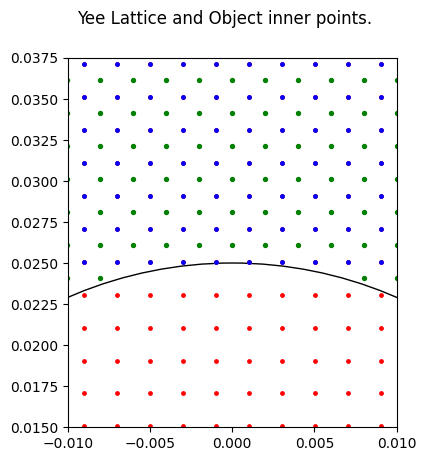

In [51]:
fig, ax = plt.subplots()
e_polygon_out = PathPatch(e_path_out_poly, facecolor='none')
e_polygon_in = PathPatch(e_path_in_poly, facecolor='none')

ax.add_patch(e_polygon_out)
ax.add_patch(e_polygon_in)
ax.scatter(E_points[0], E_points[1], c="r", s=6)

ax.scatter(Xe[bool_array_e], Ye[bool_array_e], c="b", s= 6)
ax.scatter(Xh[bool_array_h], Yh[bool_array_h], c="g", s= 8)

#ax.scatter(H_p[0], H_p[1], c="b", s=10)

ax.set_ylim(0.015, ylim[1]/8)
ax.set_xlim(*xlim/20)
ax.set_aspect('equal', adjustable='box')
fig.suptitle("Yee Lattice and Object inner points.")
plt.show()

In [52]:
Xe_in = Xe[bool_array_e]
Ye_in = Ye[bool_array_e]

In [53]:
Xe_in.shape

(1464,)

In [54]:
Xe_in.reshape(1,-1)

array([[-0.00502513, -0.00301508, -0.00100503, ...,  0.00100503,
         0.00301508,  0.00502513]])

In [55]:
bool_array_e

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [61]:
Xe_in = Xe[bool_array_e]
Ye_in = Ye[bool_array_e]
gij_in_e = func_gij(Xe_in, Ye_in)


Xh_in = Xh[bool_array_h]
Yh_in = Yh[bool_array_h]
gij_in_h = func_gij(Xh_in, Yh_in)


g_tensor_e[bool_array_e, :, :] = gij_in_e
g_tensor_h[bool_array_h, :, :] = gij_in_h

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 3) + inhomogeneous part.

System setting is done

In [60]:
from imfdtd.consts import c0, mu0, ep0

In [61]:
dx = E_points[0][0][1] - E_points[0][0][0]
dy = E_points[0][1][1] - E_points[0][1][0]
dx, dy

(0.002010050251256279, 0.002010050251256279)

In [62]:
dt = min(dx, dy)/(2*c0)

In [63]:
E_points, H_points
E_field, H_field
g_tensor_e, g_tensor_h
D_field = E_field

## Field time evolution

$$\frac{\partial D_z}{\partial t} = \frac{1}{\sqrt{\epsilon_0 \mu_0}}\left (\frac{\partial H_y}{\partial x} -\frac{\partial H_x}{\partial y}\right)$$


```
E[0,0]

H[0,0], H[0, 1]
H[1,0], H[1, 1]
```

$$\begin{bmatrix}
(i'+1, j'+1) & & (i'+1, j)\\
& (i, j)& \\
(i', j'+1)& &(i', j')
\end{bmatrix}$$

* $dx$ direction: $j+$ 
* $dy$ direction: $i+$

```
H[1,1]

E[0,0], E[0, 1]
E[1,0], E[1, 1]
```

Let $i = i', j=j'$ in value.

$$\begin{bmatrix}
(i-1, j-1) & & (i-1, j)\\
& (i', j')& \\
(i, j-1)& &(i, j)
\end{bmatrix}$$

In [414]:
D_field[...] = 0
E_field[...] = 0
H_field[...] = 0

i=0
t0 =0
dt 

3.3524029668155945e-12

In [415]:
D_field[..., 2] = np.exp(-800*(E_points[0]**2 + E_points[1]**2))

E_field = D_field

H_field[1:, 1:-1, 0] = H_field[1:, 1:-1, 0] + (-0.5)*np.diff(E_field[..., 2], axis=1)
H_field[1:-1, 1:, 1] = H_field[1:-1, 1:, 1] + 0.5*np.diff(E_field[..., 2], axis=0)

In [424]:
D_field[..., 2] = D_field[..., 2] + 0.5* (
        np.diff(H_field, axis=1)[:-1][..., 1] - np.diff(H_field, axis=0)[:, :-1][..., 0])
E_field = D_field
    #mv_mul(g_tensor_e, D_field)
    
H_field[1:, 1:-1, 0] = H_field[1:, 1:-1, 0] + (-0.5)*np.diff(E_field[..., 2], axis=1)
H_field[1:-1, 1:, 1] = H_field[1:-1, 1:, 1] + 0.5*np.diff(E_field[..., 2], axis=0)
    
i +=1

In [431]:
for j in range(0, 5):
    D_field[..., 2] = D_field[..., 2] + 0.5* (
        np.diff(H_field, axis=1)[:-1][..., 1] - np.diff(H_field, axis=0)[:, :-1][..., 0])
    E_field = D_field
    #mv_mul(g_tensor_e, D_field)
    
    H_field[1:, 1:-1, 0] = H_field[1:, 1:-1, 0] + (-0.5)*np.diff(E_field[..., 2], axis=1)
    H_field[1:-1, 1:, 1] = H_field[1:-1, 1:, 1] + 0.5*np.diff(E_field[..., 2], axis=0)
    
    i +=1

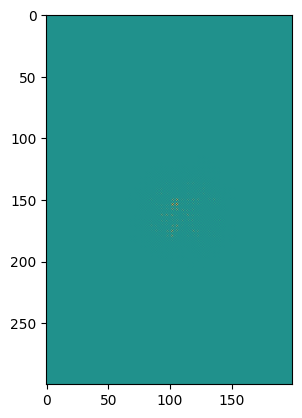

In [432]:
plt.imshow(D_field[:, :,2])

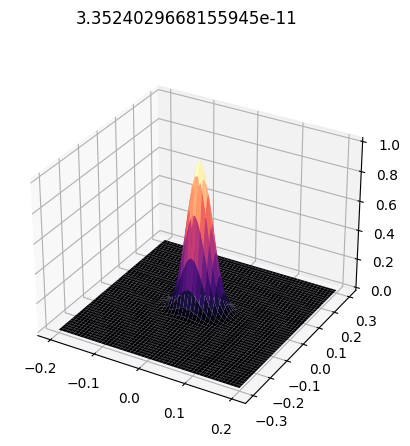

In [419]:
fig = plt.figure()
ax3d = fig.add_subplot(projection="3d")
ax3d.plot_surface(E_points[0], E_points[1], D_field[..., 2], cmap="magma")
fig.suptitle(f"{i*dt}")
plt.show()

In [ ]:
X,Y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
Z = np.

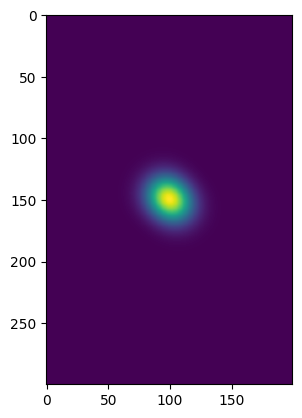

In [421]:
plt.imshow(D_field[:, :,2])

<StemContainer object of 3 artists>

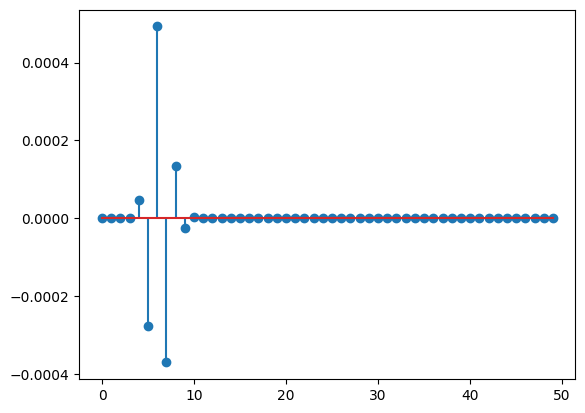

In [303]:
fig, ax = plt.subplots()

D_field[4,:, 2] = amp*np.sin(w*(t0+dt*i))
    
D_field[..., 2] = D_field[..., 2] + 0.5* (
        np.diff(H_field, axis=1)[:-1][..., 1] - np.diff(H_field, axis=0)[:, :-1][..., 0])
E_field = D_field
    #mv_mul(g_tensor_e, D_field)
    
H_field[1:, 1:-1, 0] = H_field[1:, 1:-1, 0] + (-0.5)*np.diff(E_field[..., 2], axis=1)
H_field[1:-1, 1:, 1] = H_field[1:-1, 1:, 1] + 0.5*np.diff(E_field[..., 2], axis=0)
    
i +=1
    
    #ax.imshow(D_field[:50, :,2])
ax.stem(D_field[:50, 2, 2])
#ax.vlines(0, 2, 4)

<StemContainer object of 3 artists>

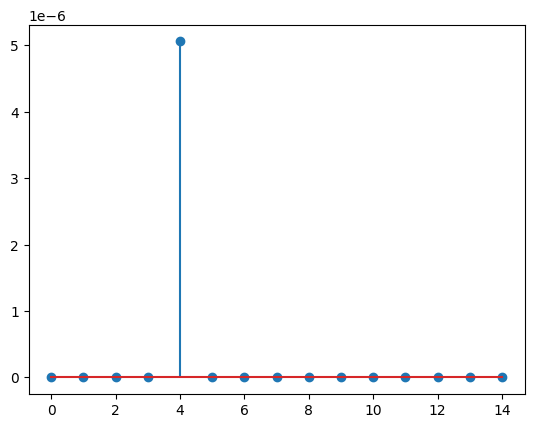

In [297]:
fig, ax = plt.subplots()
ax.stem(D_field[:15, 2, 2])

In [206]:
plt.plot_surface(E_points[0], E_points[1], D_field[...,2], cmap='RdBu')

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_surface'

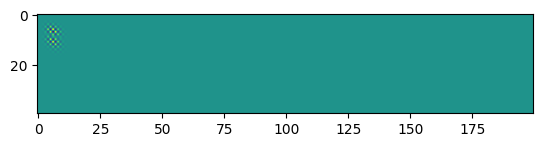

In [201]:
plt.imshow(D_field[:40,:, 2])

```
E[0,0]

H[0,0], H[0, 1]
H[1,0], H[1, 1]
```

$$(i,j) -> (i +1, j+1), (i+1, j), (i,j+1), (i,j)$$

* $dx$ direction: $j+$ 
* $dy$ direction: $i+$

$$$$

In [90]:
E_field[20: 40,:, 2] = 1

In [91]:
E_field[..., 2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

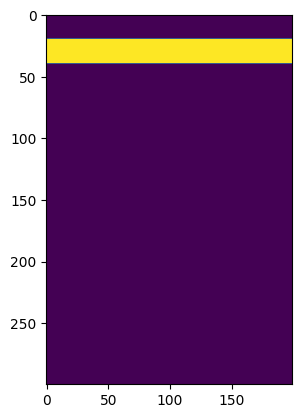

In [93]:
plt.imshow(E_field[..., 2])

In [ ]:
Ez_evolv